#### **Aim: Implementation of Boosting Algorithms: AdaBoost, Stochastc Gradient Boosting, Voting Ensemble.**

**About Iris Dataset:**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple
Measurements in Taxonomic Problems, can also be found on the UCI Machine Learning
Repository. It includes three iris species with 50 samples each as well as some properties about
each flower. One flower species is linearly separable from the other two, but the other two are
not linearly separable from each other.
The columns in this dataset are:

● Id

● SepalLengthCm

● SepalWidthCm

● PetalLengthCm

● PetalWidthCm

● Species

**AdaBoost:**

AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called Decision Stumps.
What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.

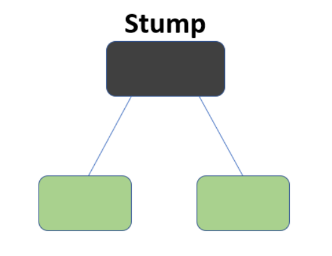

**Working of AdaBoost:**

● Initially, Adaboost selects a training subset randomly.

● It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.

● It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.

● Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.

● This process iterates until the complete training data fits without any error or until reached to the specified maximum number of estimators.

● To classify, perform a "vote" across all of the learning algorithms you built.
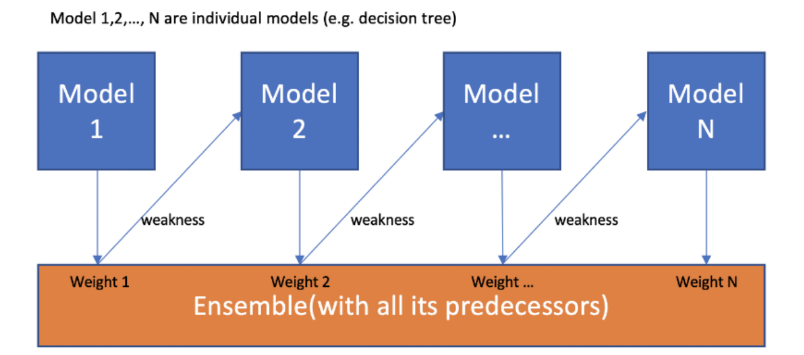

In [1]:
import numpy as nm
import pandas as pd
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()
x = iris.data[:, :4]
y = iris.target

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Fitting the AdaBoost classifier to the training set:

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(),learning_rate=1)
sunny_model = adaboost.fit(x_train,y_train)
sunny_model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [37]:
y_pred = sunny_model.predict(x_test)
from sklearn.metrics import accuracy_score
print(y_test.tolist())
print(y_pred)
print("The accuracy of the model on validation set is", accuracy_score(y_test,y_pred))

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
The accuracy of the model on validation set is 0.9555555555555556


In [38]:
# Define the class names
class_names = ['setosa', 'versicolor', 'virginica']

# Convert numerical labels to class names in y_test
y_test_labels = [class_names[label] for label in y_test]

# Convert numerical labels to class names in y_pred
y_pred_labels = [class_names[label] for label in y_pred]

# Print y_test and y_pred with class names
print(y_test_labels)
print(y_pred_labels)

# Calculate accuracy using class names
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("The accuracy of the model on the validation set is:", accuracy)

['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'virginica', 'virginica', 'versicolor']
['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', '

### Gradient Descent
Gradient descent (GD) is an iterative first-order optimization algorithm used to find a local
minimum/maximum of a given function. This method is commonly used in machine learning
(ML) and deep learning(DL) to minimize a cost/loss function (e.g. in a linear regression).

The best way to define the local minimum or local maximum of a function using gradient descent is as follows:

● If we move towards a negative gradient or away from the gradient of the function at the current point, it will give the local minimum of that function.

● Whenever we move towards a positive gradient or towards the gradient of the function at the current point, we will get the local maximum of that function.

**Working of Gradient Descent: **
The starting point(shown in above fig.) is used to evaluate the performance as it is considered
just as an arbitrary point. At this starting point, we will derive the first derivative or slope and
then use a tangent line to calculate the steepness of this slope. Further, this slope will inform the
updates to the parameters (weights and bias).
The slope becomes steeper at the starting point or arbitrary point, but whenever new
parameters are generated, then steepness gradually reduces, and at the lowest point, it
approaches the lowest point, which is called a point of convergence.
The main objective of gradient descent is to minimize the cost function or the error between expected and actual. 
To minimize the cost function, two data points are required:

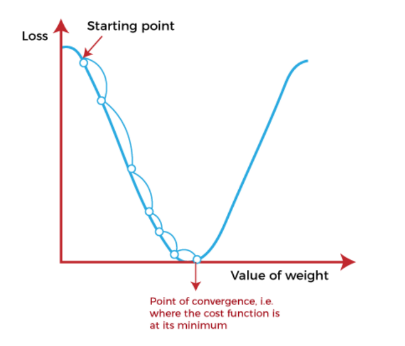

### Stochastic Gradient Descent:
Stochastic gradient descent (SGD) is a type of gradient descent that runs one training example per iteration. Or in other words, it processes a training epoch for each example within a datase and updates each training example's parameters one at a time.

In [11]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv('diabetes.csv', delimiter=",")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
x = data.iloc[:,0:8].values
y = data.iloc[:,8].values

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Running various models -

In [15]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))

In [16]:
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(eta=0.01, gamma=10)))

In [17]:
import time
results = []
name = []
scoring = 'accuracy'

In [18]:
for name,model in models:
  start_time = time.time()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0), name)
  print("--- %s seconds ---"% (time.time() - start_time))

Accuracy: 77.92% Logistic Regression
--- 0.044225454330444336 seconds ---
Accuracy: 73.38% KNN
--- 0.01197052001953125 seconds ---
Accuracy: 78.57% SVM
--- 0.018146038055419922 seconds ---
Accuracy: 78.57% XGB
--- 0.14017462730407715 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Voting Ensemble:**

A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.
It is a technique that may be used to improve model performance, ideally achieving better
performance than any single model used in the ensemble.
A voting ensemble works by combining the predictions from multiple models. It can be used for
classification or regression. In the case of regression, this involves calculating the average of the predictions from the models. In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

● Regression Voting Ensemble: Predictions are the average of contributing models.

● Classification Voting Ensemble: Predictions are the majority vote of contributing models.

There are two approaches to the majority vote prediction for classification; they are hard voting and soft voting.

**Hard voting** involves summing the predictions for each class label and predicting the class label with the most votes. Soft voting involves summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

● Hard Voting: Predict the class with the largest sum of votes from models

● Soft Voting: Predict the class with the largest summed probability from models.

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
iris = load_iris()
x = iris.data[:, :4]
y = iris.target

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
estimator = []
estimator.append(('Logistic Regression', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(gamma = 'auto', probability = True)))
estimator.append(('Decision Tree Classfier',
DecisionTreeClassifier()))

In [29]:
vote_hard = VotingClassifier(estimators=estimator, voting='hard')
vote_hard.fit(x_train, y_train)
y_pred = vote_hard.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %d" % score)

Hard Voting Score 1


In [30]:
vote_soft = VotingClassifier(estimators=estimator, voting='soft')
vote_soft.fit(x_train, y_train)
y_pred = vote_soft.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %d" % score)

Soft Voting Score 1


Conclusion:
We have successfully implemented Boosting Algorithms: AdaBoost, Stochastic Gradient Boosting, Voting Ensemble.